In [1]:
import os

try:
    os.chdir('/Users/cha/Desktop/공모전/삼성화재X포스텍_리스크경진대회/내코드/data/')
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")

Directory changed


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import timedelta

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
import platform
if platform.system() == 'Darwin': 
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
os.getcwd()

'/Users/cha/Desktop/공모전/삼성화재X포스텍_리스크경진대회/내코드/data'

# Data Load

In [6]:
monthly = pd.read_csv('지구온도data/monthly.csv')
annualy = pd.read_csv('지구온도data/annualy.csv')

In [7]:
monthly

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292
...,...,...,...
3283,GISTEMP,1880-03-06,-0.1800
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3286,GCAG,1880-01-06,0.0009


In [8]:
monthly['Source'].value_counts()

GCAG       1644
GISTEMP    1644
Name: Source, dtype: int64

# Monthly

In [9]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  3288 non-null   object 
 1   Date    3288 non-null   object 
 2   Mean    3288 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.2+ KB


In [10]:
monthly['Date'] = pd.to_datetime(monthly['Date'], format='%Y-%m-%d')

In [11]:
monthly.isnull().sum()

Source    0
Date      0
Mean      0
dtype: int64

## GCAG

In [12]:
a = monthly[monthly['Source']=='GCAG']
a = a.sort_values('Date', ascending=True)
a

,Source,Date,Mean
3286,GCAG,1880-01-06,0.0009
3284,GCAG,1880-02-06,-0.1229
3282,GCAG,1880-03-06,-0.1357
3280,GCAG,1880-04-06,-0.0499
3278,GCAG,1880-05-06,-0.0738
...,...,...,...
8,GCAG,2016-08-06,0.8998
6,GCAG,2016-09-06,0.8767
4,GCAG,2016-10-06,0.7292
2,GCAG,2016-11-06,0.7504


In [13]:
a.set_index('Date', inplace=True)

In [14]:
a

,Source,Mean
Date,,
1880-01-06,GCAG,0.0009
1880-02-06,GCAG,-0.1229
1880-03-06,GCAG,-0.1357
1880-04-06,GCAG,-0.0499
1880-05-06,GCAG,-0.0738
...,...,...
2016-08-06,GCAG,0.8998
2016-09-06,GCAG,0.8767
2016-10-06,GCAG,0.7292


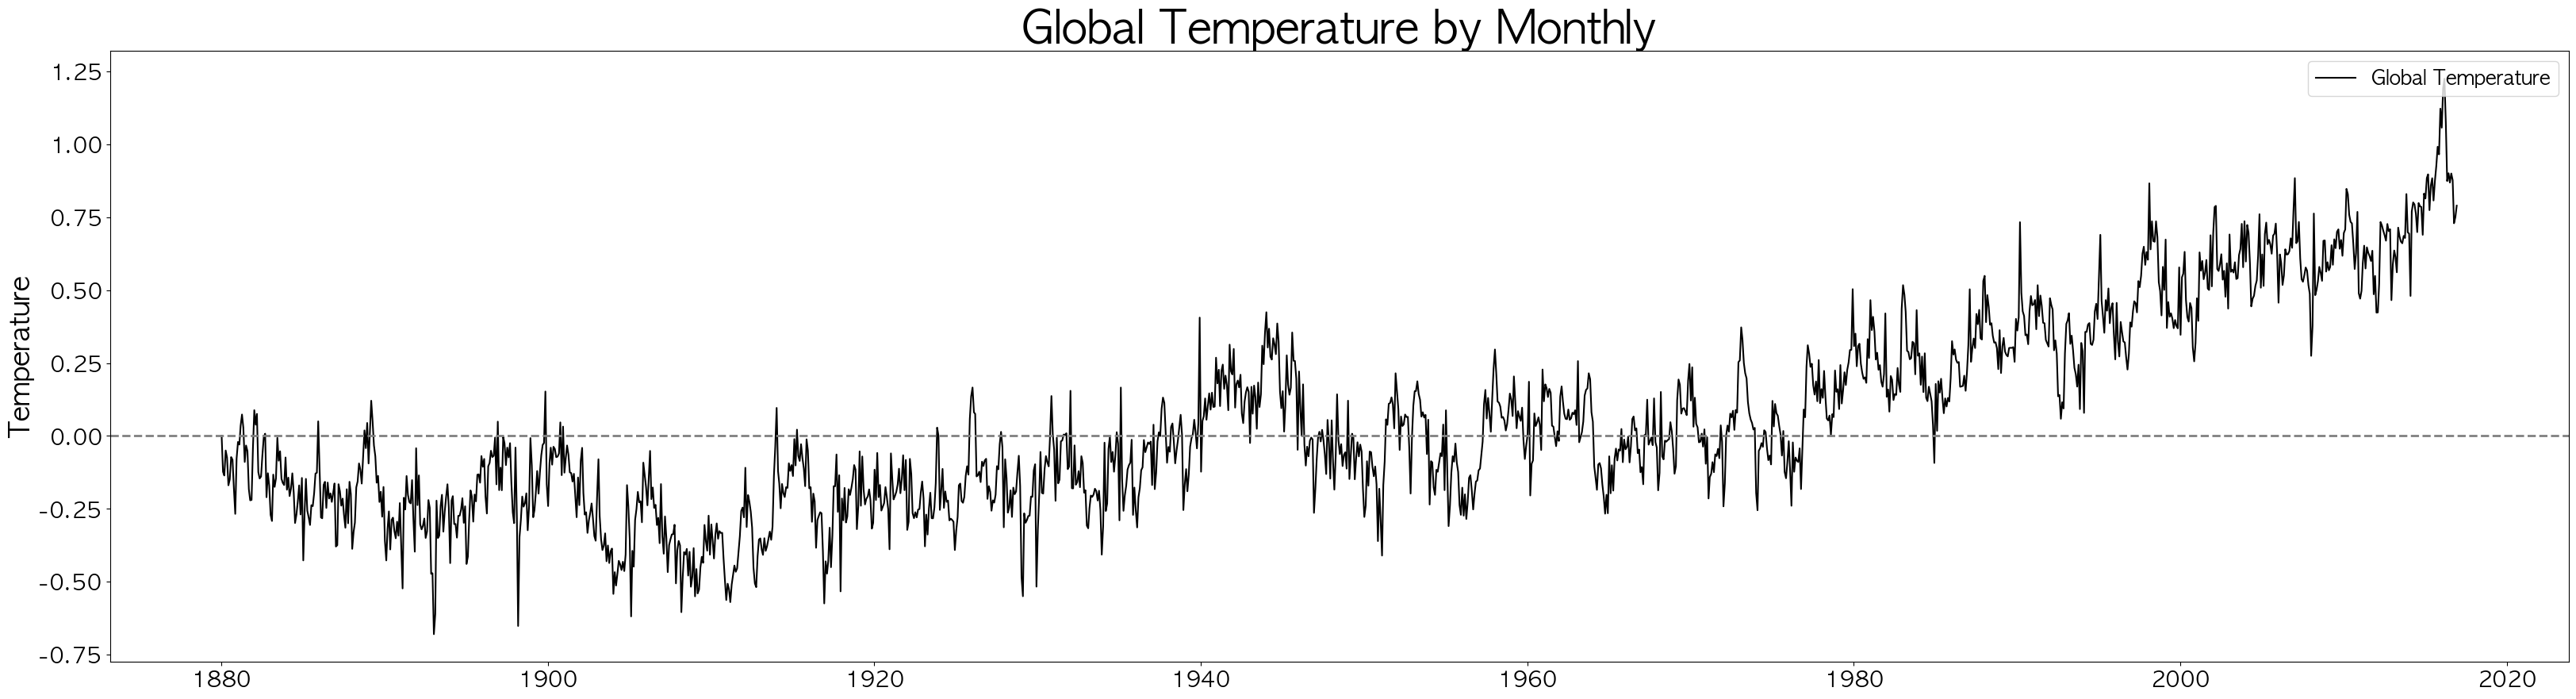

In [16]:
fig, ax1 = plt.subplots(figsize=(40, 10))

A = a
line1 = ax1.plot(A.index, a['Mean'], label='Global Temperature', color='k')

#ax1.set_ylim([340, 385])
#plt.yticks([0, 10, 20, 30, 40, 50, 60, 3.1])

lines = line1
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('Temperature', fontdict={'fontsize':25})

# plt.xticks(range(len(a))[::len(a)//300], a.index[::len(a)//300].strftime('%Y-%m'))
# plt.xticks(A.index[::200], A.index[::200].strftime('%Y-%m-%d'), rotation=45)
plt.title('Global Temperature by Monthly', fontdict = {'fontsize' : 40})
plt.rcParams['font.size'] = 20
plt.axhline(0, color='0.5', linestyle='--', linewidth=2)
plt.show()

## GISTEMP

In [23]:
b = monthly[monthly['Source']=='GISTEMP']
b = b.sort_values('Date', ascending=True)
b.set_index('Date', inplace=True)

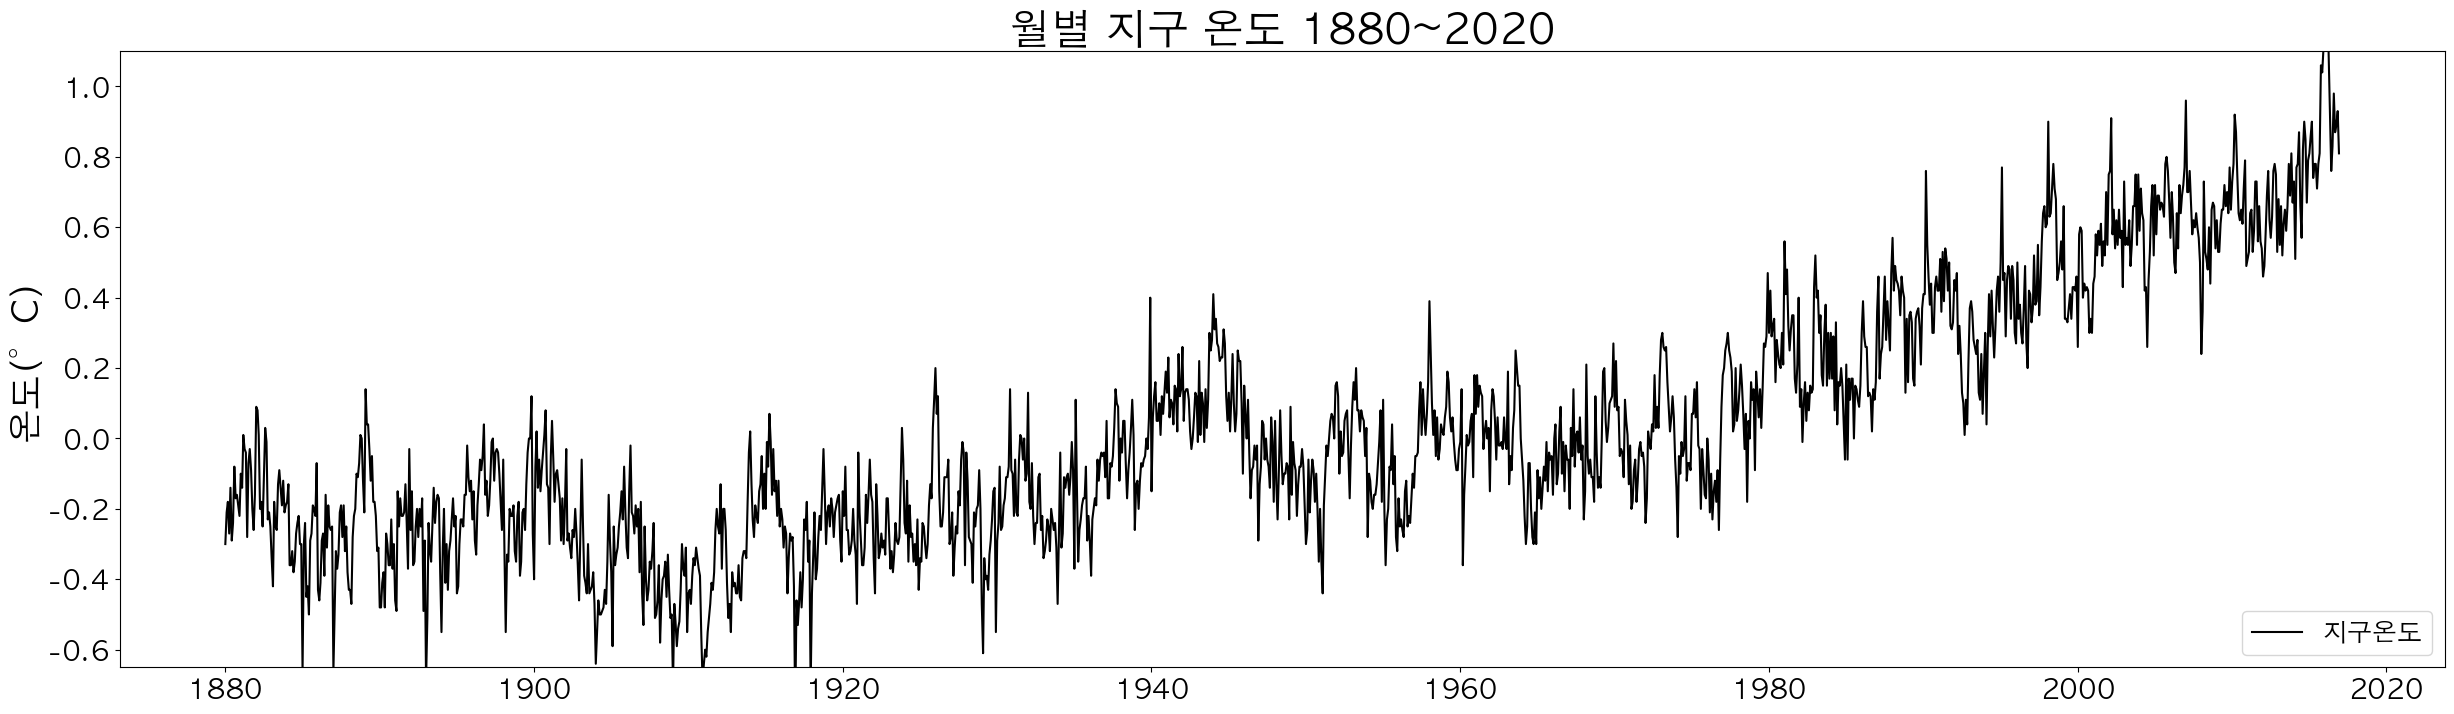

In [24]:
fig, ax1 = plt.subplots(figsize=(30, 8))

A = b
line1 = ax1.plot(A.index, A['Mean'], label='지구온도', color='k')
ax1.set_ylim([-0.65, 1.1])
#plt.yticks([0, 10, 20, 30, 40, 50, 60, 3.1])

lines = line1
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='lower right')
ax1.set_ylabel('온도(°C)', fontdict={'fontsize':25})

# plt.xticks(range(len(a))[::len(a)//300], a.index[::len(a)//300].strftime('%Y-%m'))
plt.title('월별 지구 온도 1880~2020', fontdict = {'fontsize' : 30})
plt.rcParams['font.size'] = 20
plt.show()

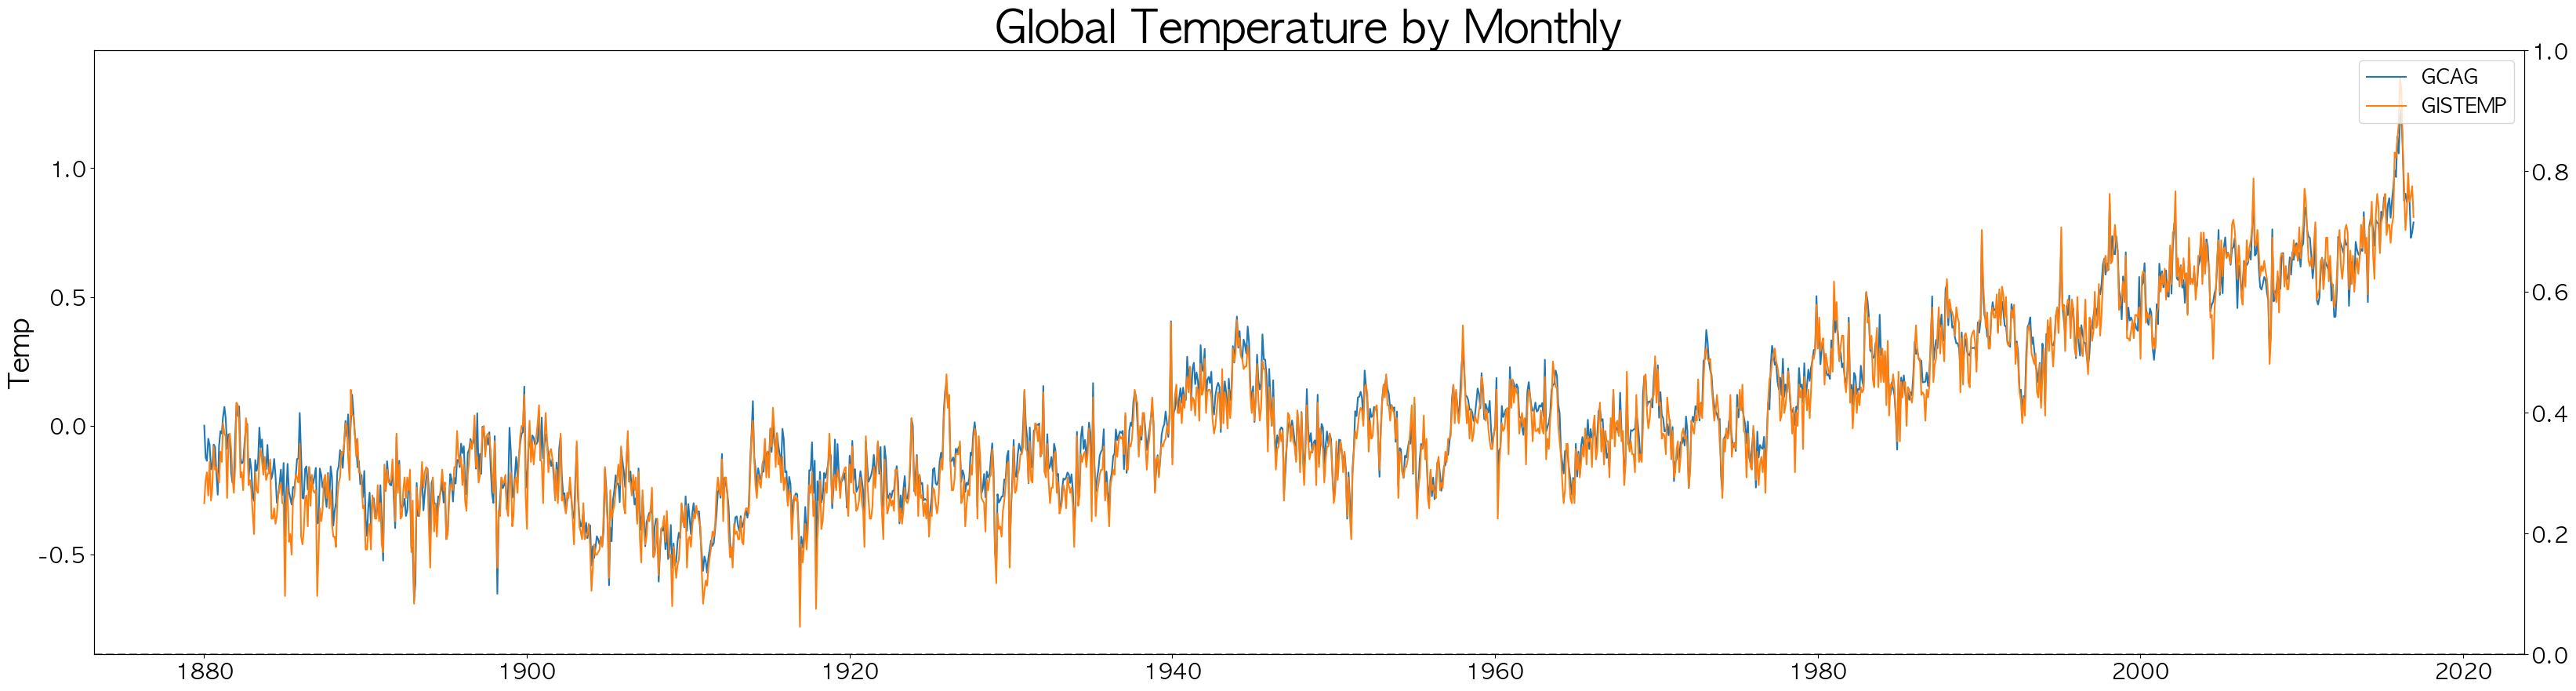

In [19]:
# GCAG, GISTEMP 모두

fig, ax1 = plt.subplots(figsize=(40, 10))
ax2 = ax1.twinx()

A = a
B = b

line1 = ax1.plot(A.index, A['Mean'], label='GCAG')
line2 = ax1.plot(B.index, B['Mean'], label='GISTEMP')


lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('Temp', fontdict={'fontsize':25})

plt.title('Global Temperature by Monthly', fontdict = {'fontsize' : 40})
plt.rcParams['font.size'] = 20
plt.axhline(0, color='0.5', linestyle='--', linewidth=2)
plt.show()

# Annualy

In [20]:
annualy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  274 non-null    object 
 1   Year    274 non-null    int64  
 2   Mean    274 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


In [21]:
annualy

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,0.9900
2,GCAG,2015,0.8998
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408
...,...,...,...
269,GISTEMP,1882,-0.1000
270,GCAG,1881,-0.0628
271,GISTEMP,1881,-0.1200
272,GCAG,1880,-0.1148


In [20]:
annualy['Year'] = pd.to_datetime(annualy['Year'], format='%Y')

In [23]:
annualy.isnull().sum()

Source    0
Year      0
Mean      0
dtype: int64

## GCAG

In [24]:
a = annualy[annualy['Source']=='GCAG']
a = a.sort_values('Year', ascending=True)
a

,Source,Year,Mean
272,GCAG,1880-01-01,-0.1148
270,GCAG,1881-01-01,-0.0628
268,GCAG,1882-01-01,-0.0648
266,GCAG,1883-01-01,-0.1424
264,GCAG,1884-01-01,-0.2009
...,...,...,...
8,GCAG,2012-01-01,0.6240
6,GCAG,2013-01-01,0.6679
4,GCAG,2014-01-01,0.7408
2,GCAG,2015-01-01,0.8998


In [25]:
a.set_index('Year', inplace=True)

In [26]:
a

,Source,Mean
Year,,
1880-01-01,GCAG,-0.1148
1881-01-01,GCAG,-0.0628
1882-01-01,GCAG,-0.0648
1883-01-01,GCAG,-0.1424
1884-01-01,GCAG,-0.2009
...,...,...
2012-01-01,GCAG,0.6240
2013-01-01,GCAG,0.6679
2014-01-01,GCAG,0.7408


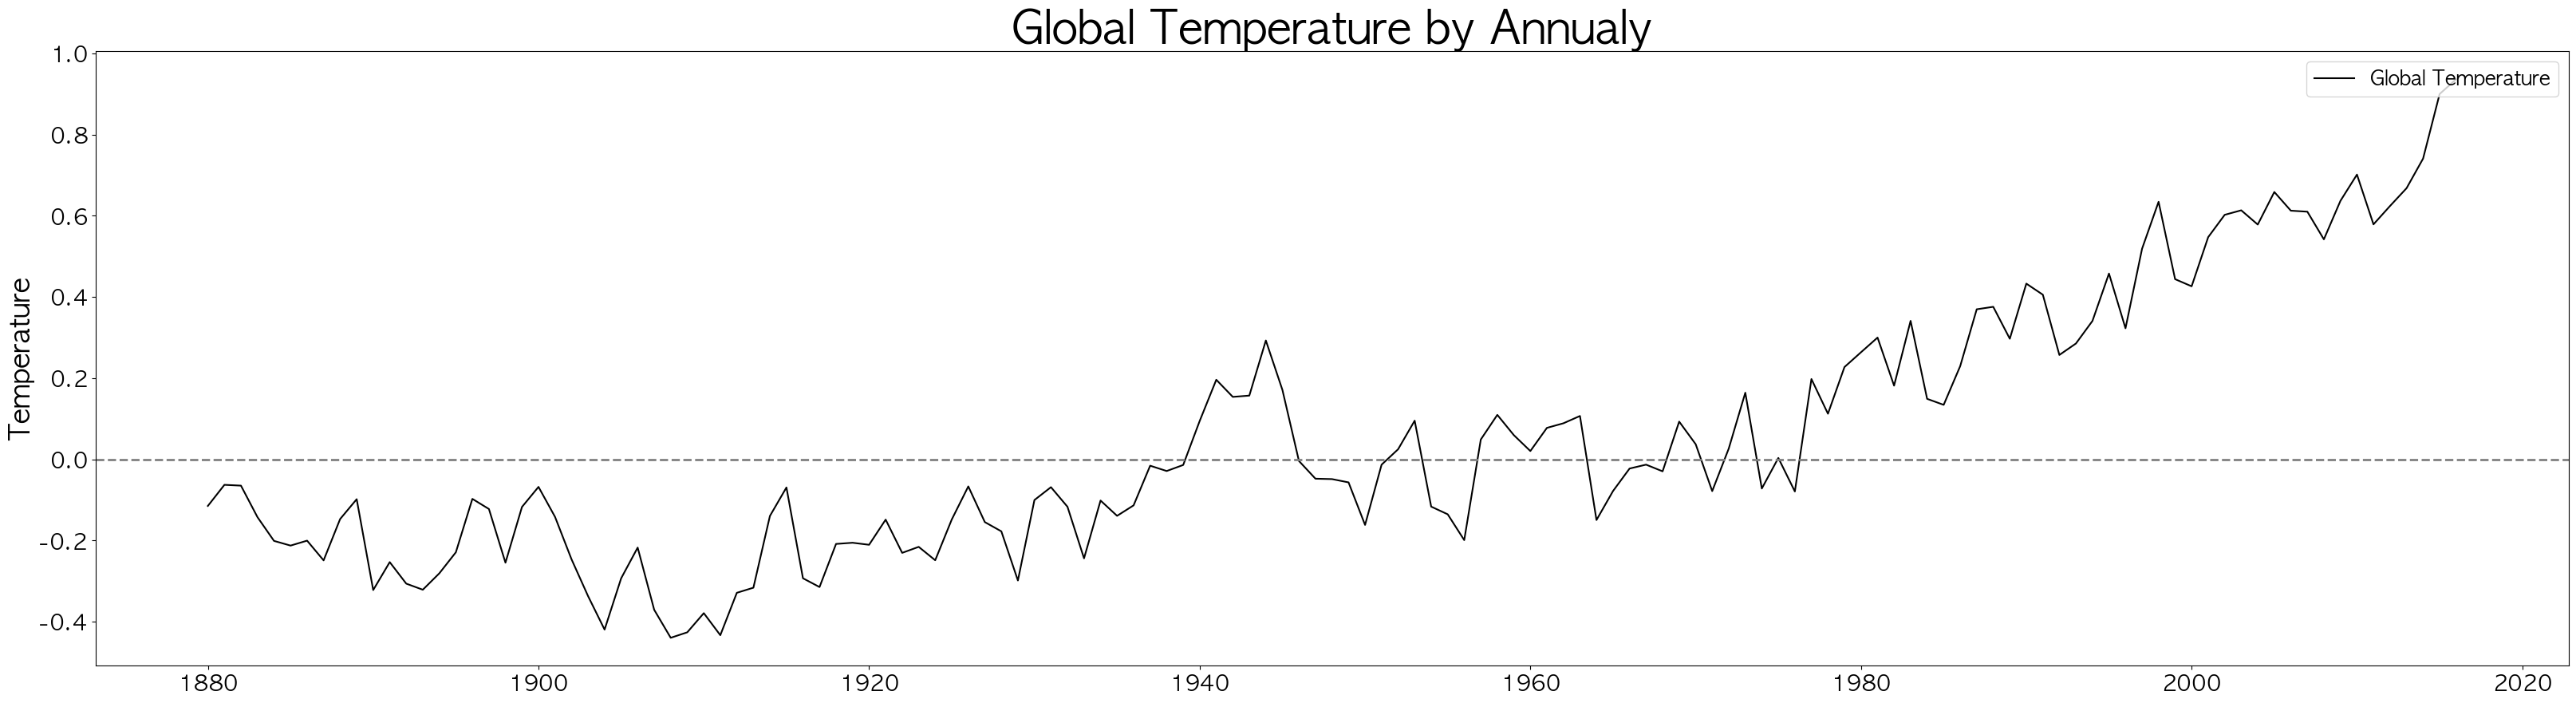

In [27]:
fig, ax1 = plt.subplots(figsize=(40, 10))

A = a
line1 = ax1.plot(A.index, a['Mean'], label='Global Temperature', color='k')

#ax1.set_ylim([340, 385])
#plt.yticks([0, 10, 20, 30, 40, 50, 60, 3.1])

lines = line1
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('Temperature', fontdict={'fontsize':25})

# plt.xticks(range(len(a))[::len(a)//300], a.index[::len(a)//300].strftime('%Y-%m'))
plt.title('Global Temperature by Annualy', fontdict = {'fontsize' : 40})
plt.rcParams['font.size'] = 20
plt.axhline(0, color='0.5', linestyle='--', linewidth=2)
plt.show()

## GISTEMP

In [25]:
b = annualy[annualy['Source']=='GISTEMP']
b = b.sort_values('Year', ascending=True)
b.set_index('Year', inplace=True)

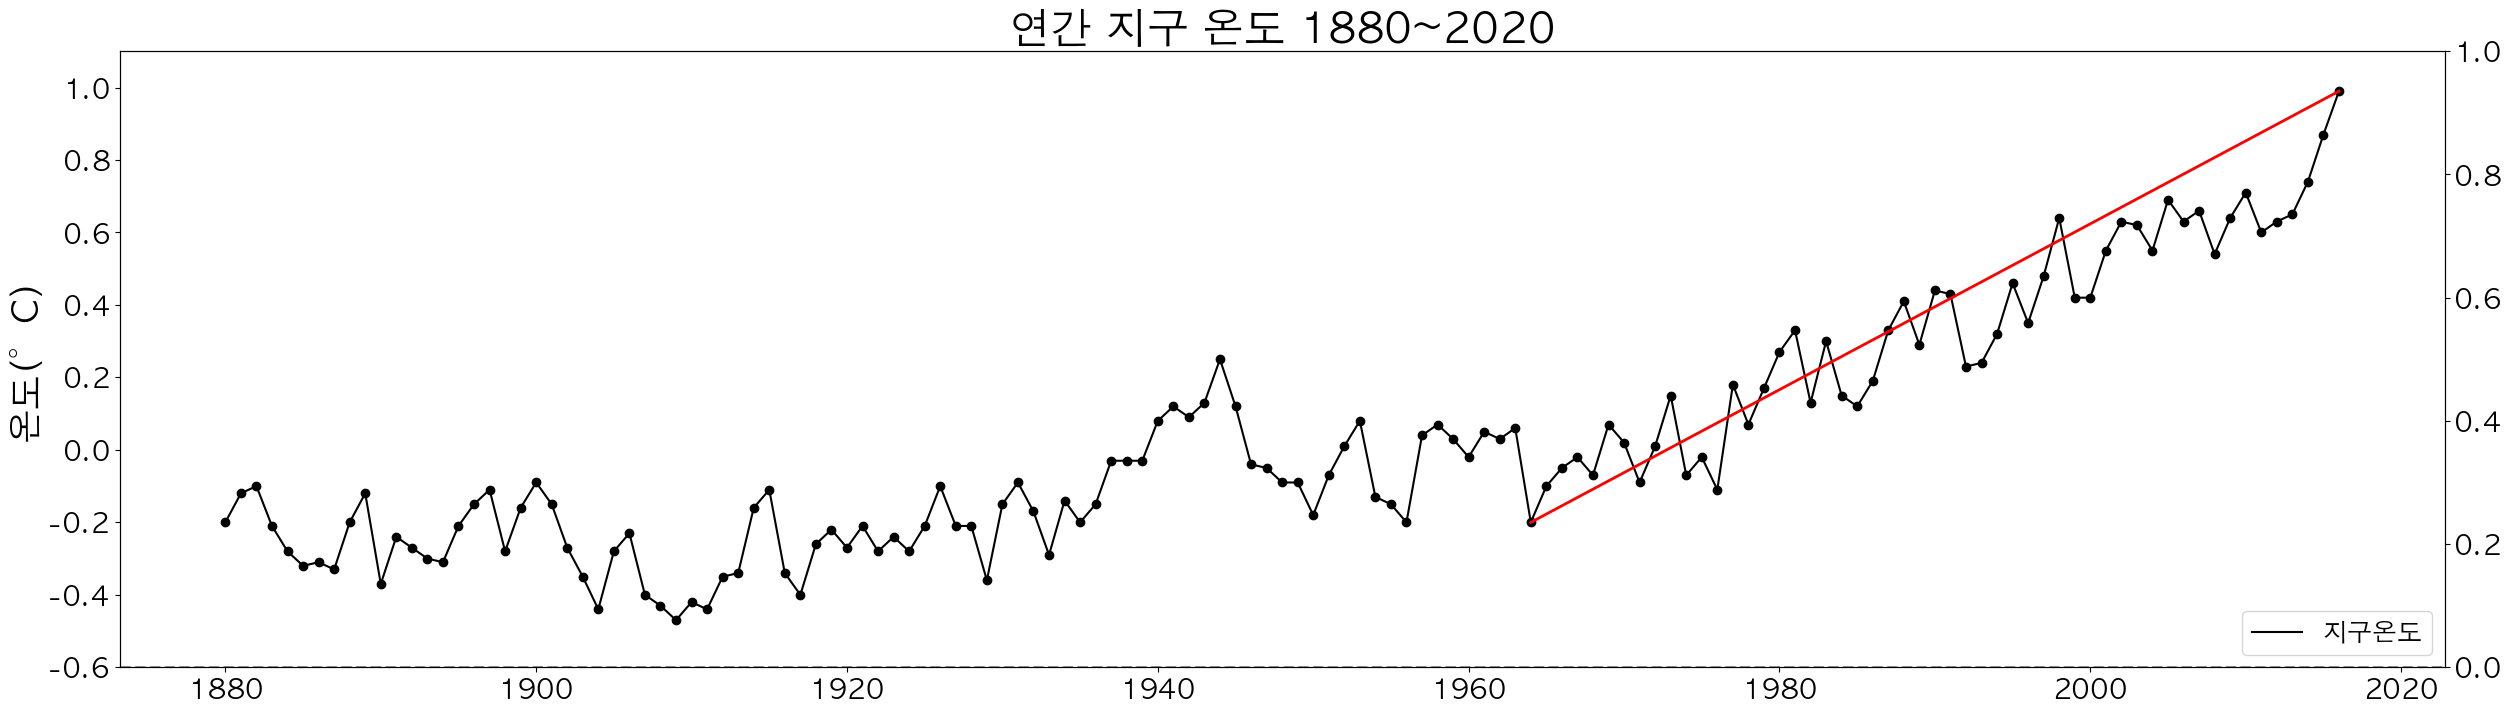

In [30]:
fig, ax1 = plt.subplots(figsize=(30, 8))
ax2 = ax1.twinx()

A = b
line1 = ax1.plot(A.index, A['Mean'], label='지구온도', color='k')
ax1.scatter(A.index, A['Mean'], label='Global Temperature', color='k')
ax1.plot([datetime.date(1964,1,1),datetime.date(2016,1,1)], [-0.2, 0.99],color="red", linewidth=2)

ax1.set_ylim([-0.6, 1.1])
#plt.yticks([0, 10, 20, 30, 40, 50, 60, 3.1])

lines = line1
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='lower right')
ax1.set_ylabel('온도(°C)', fontdict={'fontsize':25})

# plt.xticks(range(len(a))[::len(a)//300], a.index[::len(a)//300].strftime('%Y-%m'))
plt.title('연간 지구 온도 1880~2020', fontdict = {'fontsize' : 30})
plt.rcParams['font.size'] = 20
plt.axhline(0, color='0.5', linestyle='--', linewidth=2)

plt.show()

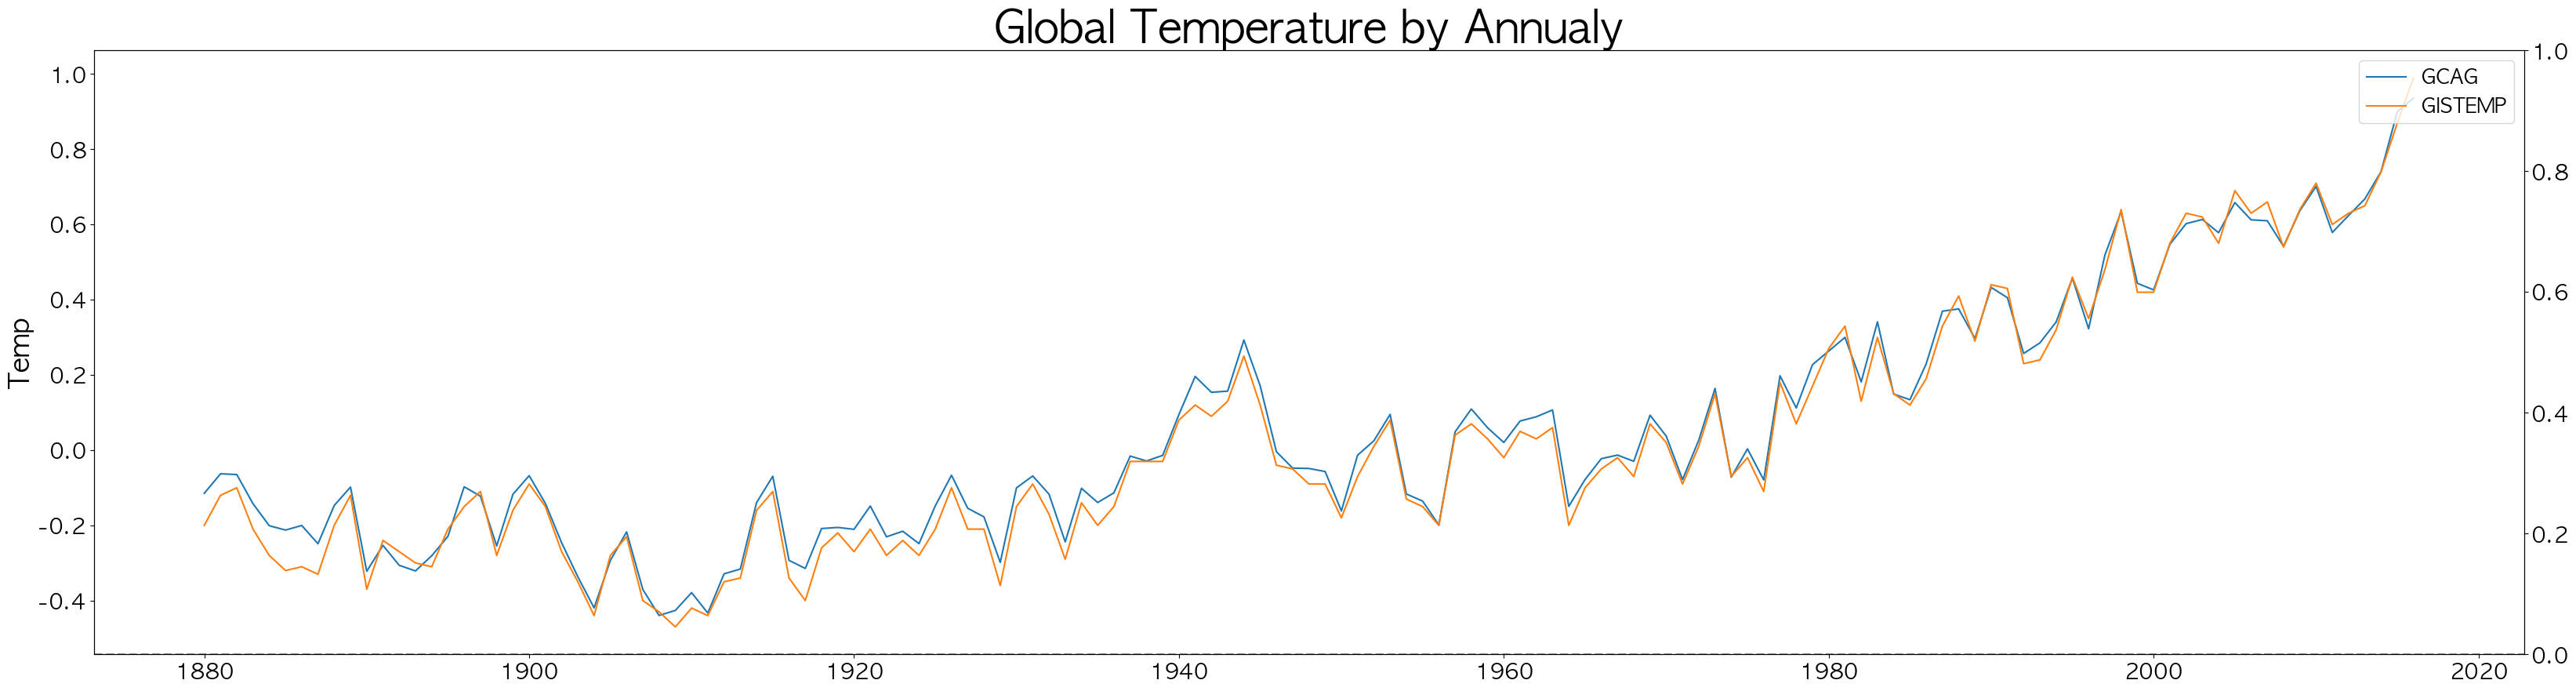

In [30]:
# GCAG, GISTEMP 모두

fig, ax1 = plt.subplots(figsize=(40, 10))
ax2 = ax1.twinx()

A = a
B = b

line1 = ax1.plot(A.index, A['Mean'], label='GCAG')
line2 = ax1.plot(B.index, B['Mean'], label='GISTEMP')


lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('Temp', fontdict={'fontsize':25})

plt.title('Global Temperature by Annualy', fontdict = {'fontsize' : 40})
plt.rcParams['font.size'] = 20
plt.axhline(0, color='0.5', linestyle='--', linewidth=2)
plt.show()

In [33]:
b.reset_index(inplace=True)

In [34]:
c = b[b['Year'].dt.year>1963]

In [35]:
c.set_index('Year', inplace=True)

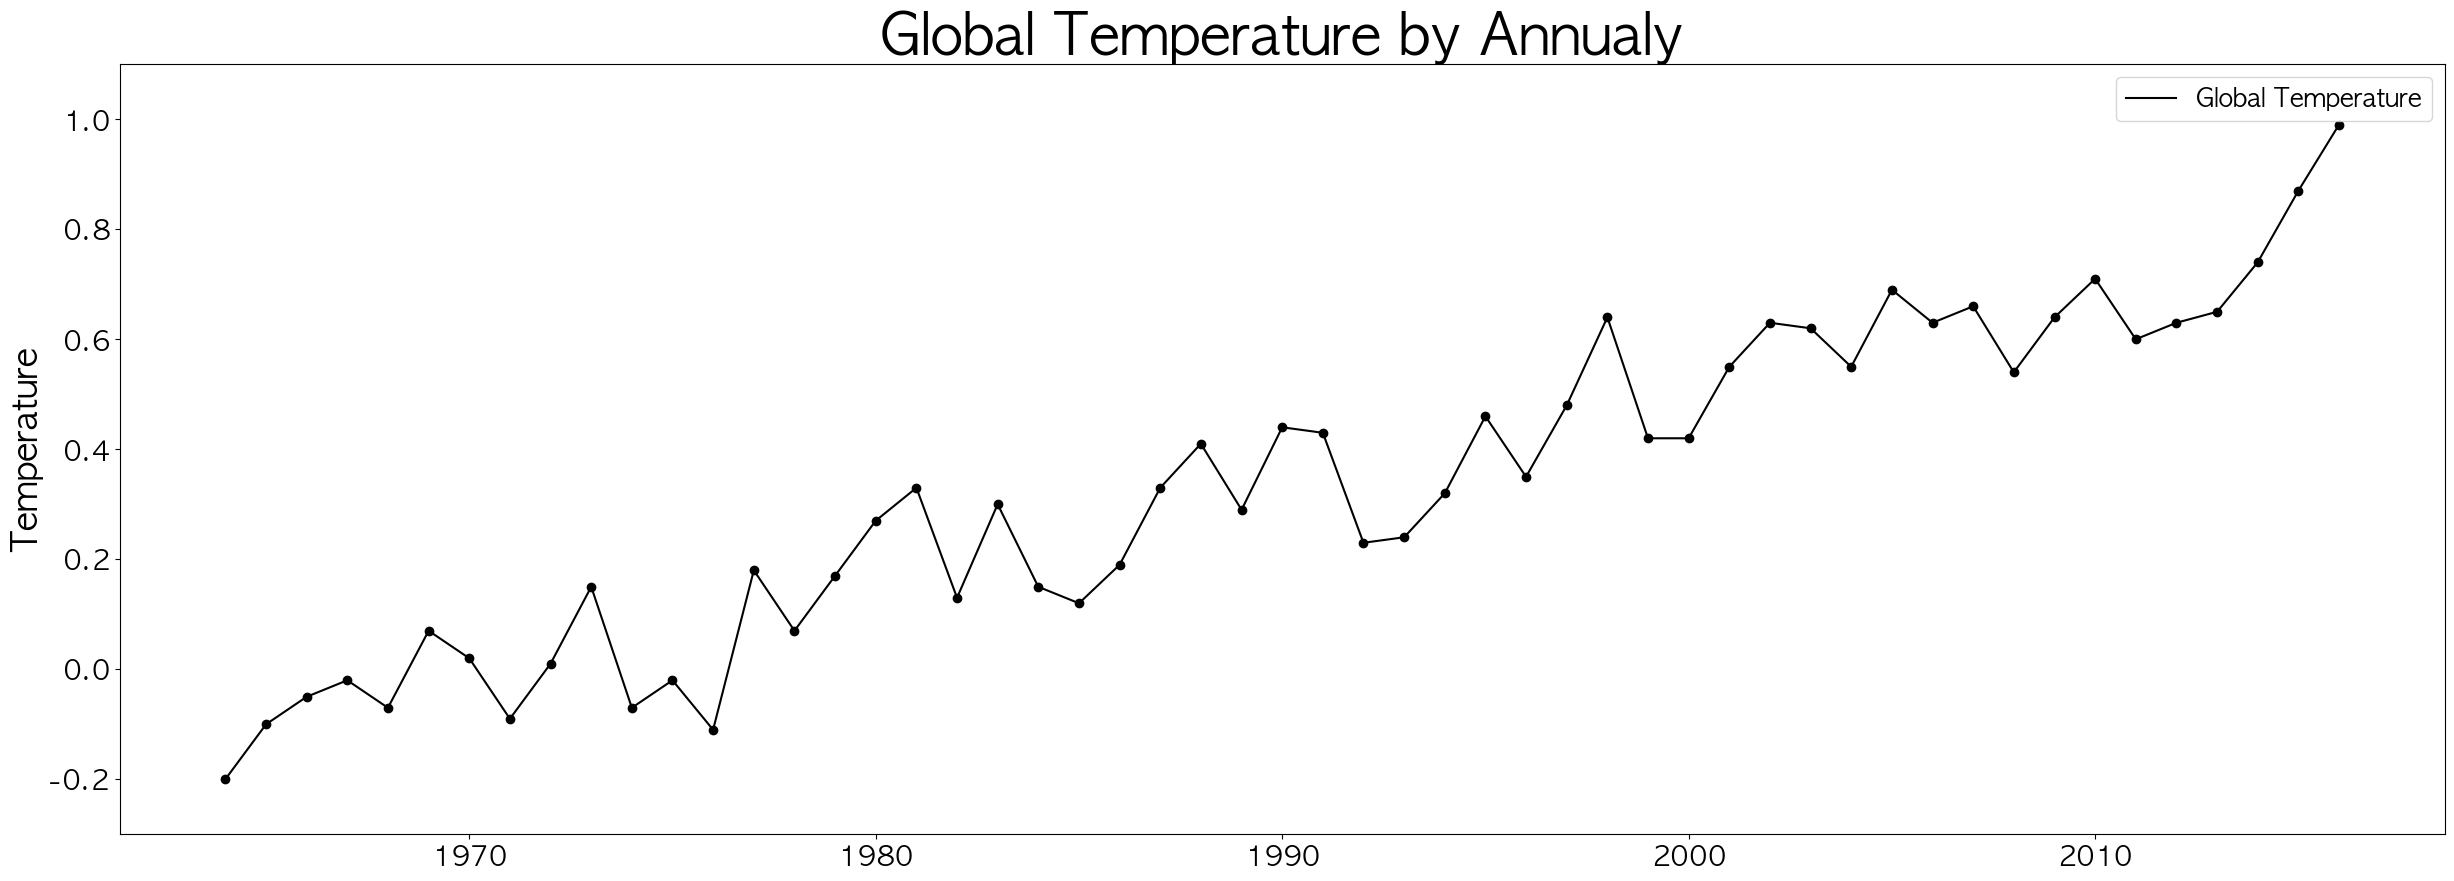

In [36]:
fig, ax1 = plt.subplots(figsize=(30, 8))

A = c
line1 = ax1.plot(A.index, A['Mean'], label='Global Temperature', color='k')
ax1.scatter(A.index, A['Mean'], label='Global Temperature', color='k')
#ax1.scatter(A.index, A['Mean'], label='Global Temperature', color='k')

ax1.set_ylim([-0.3, 1.1])
#plt.yticks([0, 10, 20, 30, 40, 50, 60, 3.1])

lines = line1
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('Temperature', fontdict={'fontsize':25})

# plt.xticks(range(len(a))[::len(a)//300], a.index[::len(a)//300].strftime('%Y-%m'))
plt.title('Global Temperature by Annualy', fontdict = {'fontsize' : 40})
plt.rcParams['font.size'] = 20
plt.show()